# Question 1 – Rabbit–Fox System

We consider the system:

\[
\begin{cases}
\dfrac{dR}{dt} = 2R - RF \\
\dfrac{dF}{dt} = -5F + RF
\end{cases}
\]

where \(R = R(t)\) is the rabbit population and \(F = F(t)\) is the fox population.

---

## 1.1 Is this system linear or non-linear?

A system of ODEs is linear only if each variable appears to the first power and never multiplied
by another variable.

### Linear terms:
- \(2R\)
- \(-5F\)

These are proportional to a *single* variable, so they are linear.

### Non-linear terms:
- \(-RF\)
- \(+RF\)

These terms involve the *product* of the two state variables and make the system **non-linear**.

The system is **non-linear**, because the interaction term \(RF\) is non-linear.

---

## 1.2 Show that the system exhibits sustained oscillations

We compute the Jacobian:

\[
J(R,F) =
\begin{pmatrix}
2 - F & -R \\
F & -5 + R
\end{pmatrix}
\]

Evaluate it at the equilibrium point \((R_0, F_0) = (5,2)\):

\[
J(5,2) =
\begin{pmatrix}
0 & -5 \\
2 & 0
\end{pmatrix}
\]

Compute the eigenvalues by solving:

$
\
\lambda^2 + 10 = 0
\
$

Thus:

$\
\lambda = \pm i\sqrt{10}
$

- Eigenvalues are **purely imaginary**
- No damping term → **closed orbits**
- This corresponds to **sustained oscillations**

The system exhibits **neutral periodic oscillations** (cycles of rabbit and fox populations).

---

## 1.3 Characterize the nature of the equilibrium point (5,2)

From Question 1.2:

\[
\lambda = \pm i\sqrt{10}
\]

Since:

- The trace is zero
- The determinant is positive
- Eigenvalues are purely imaginary

The fixed point is a **center**.

### **Conclusion**
The equilibrium \((5,2)\) is a **nonlinear center**, producing sustained periodic cycles of rabbits and foxes.


## 1.3 Characterize the nature of the equilibrium point (5,2)

From Question 1.2:

$
\
\lambda = \pm i\sqrt{10}
\
$

Since:

- The trace is zero
- The determinant is positive
- Eigenvalues are purely imaginary

The fixed point is a **center**.

The equilibrium \((5,2)\) is a **nonlinear center**, producing sustained periodic cycles of rabbits and foxes.

---

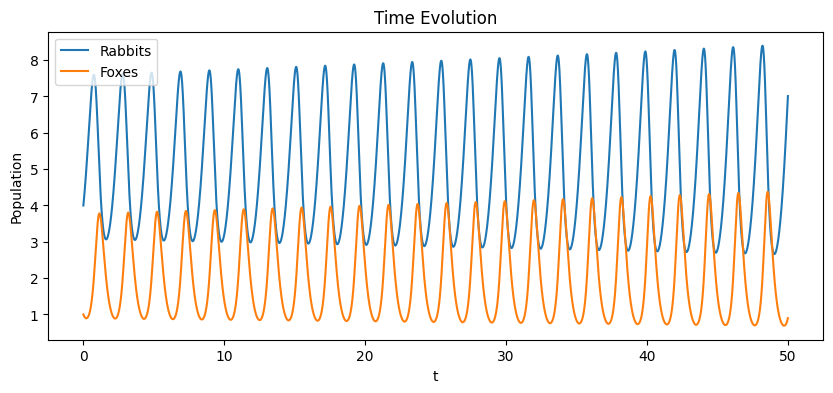

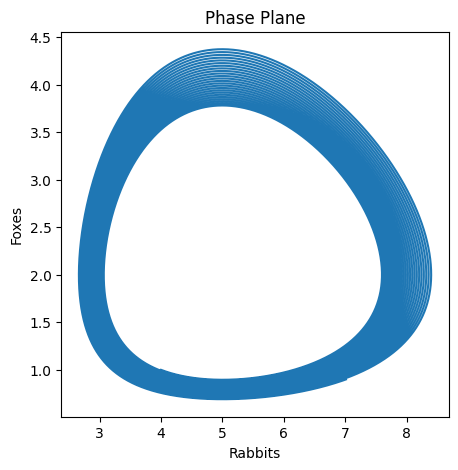

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(R, F):
    dR = 2*R - R*F
    dF = -5*F + R*F
    return dR, dF

def euler(R0, F0, dt=0.001, T=50):
    steps = int(T/dt)
    R = np.zeros(steps)
    F = np.zeros(steps)
    R[0], F[0] = R0, F0

    for i in range(1, steps):
        dR, dF = f(R[i-1], F[i-1])
        R[i] = R[i-1] + dt * dR
        F[i] = F[i-1] + dt * dF

    return R, F, np.linspace(0, T, steps)

R, F, t = euler(4, 1)

plt.figure(figsize=(10,4))
plt.plot(t, R, label="Rabbits")
plt.plot(t, F, label="Foxes")
plt.legend()
plt.xlabel("t")
plt.ylabel("Population")
plt.title("Time Evolution")
plt.show()

# Phase plane
plt.figure(figsize=(5,5))
plt.plot(R, F)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plane")
plt.show()


# Question 2 – Generalized Rabbit–Fox System

We consider the system:

$$
\frac{dR}{dt} = aR - RF
$$

$$
\frac{dF}{dt} = -cF + RF
$$

---

## 2.1 What is the dimension of $a$ and $c$?

The term $aR$ must have the same units as $dR/dt$, which is population per time.

- $R$ has units: population  
- Therefore $aR$ has units: population per time  

Thus:

$$
[a] = 1/\text{time}
$$

Similarly, $-cF$ implies:

$$
[c] = 1/\text{time}
$$

**Both $a$ and $c$ have dimension $1/\text{time}$.**

---

## 2.2 Find the equilibrium points

Solve:

$$
aR - RF = 0
$$

$$
-cF + RF = 0
$$

Factor:

1. $R(a - F) = 0$  
   → $R = 0$ or $F = a$

2. $F(R - c) = 0$  
   → $F = 0$ or $R = c$

### Equilibria

1. Trivial equilibrium:

$$
(R_0, F_0) = (0, 0)
$$

2. Coexistence equilibrium:

$$
(R_0, F_0) = (c, a)
$$

---

## 2.3 Can $a$ and $c$ take any positive value?

Biological meaning:

- $a$ is the rabbit intrinsic growth rate → must be positive  
- $c$ is the fox intrinsic death rate → must be positive  

Also, for the coexistence equilibrium $(c,a)$:

- $R_0 = c > 0$
- $F_0 = a > 0$

Therefore:

$$
a > 0,\quad c > 0
$$

Only positive values are biologically reasonable.

---

## 2.4 Show that the system sustains oscillations for all positive $a$ and $c$

Jacobian:

$$
J(R,F) =
\begin{pmatrix}
a - F & -R \\
F & R - c
\end{pmatrix}
$$

At the coexistence equilibrium $(R_0, F_0) = (c, a)$:

$$
J(c,a) =
\begin{pmatrix}
0 & -c \\
a & 0
\end{pmatrix}
$$

Eigenvalues satisfy:

$$
\lambda^2 + ac = 0
$$

Thus:

$$
\lambda = \pm i\sqrt{ac}
$$

Since $a>0$ and $c>0$, the eigenvalues are purely imaginary.
---


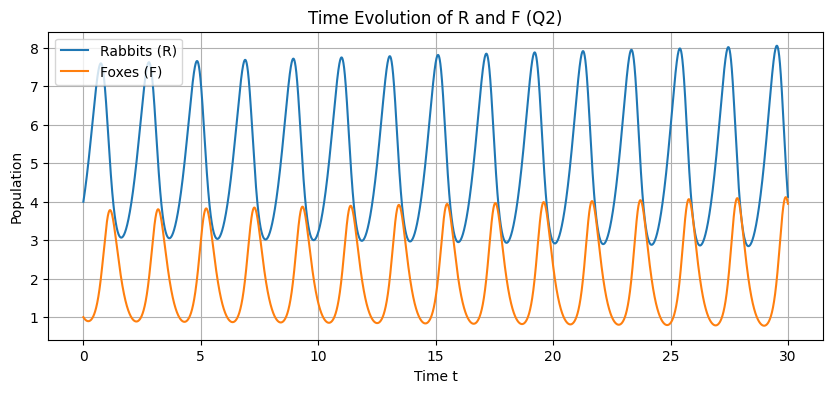

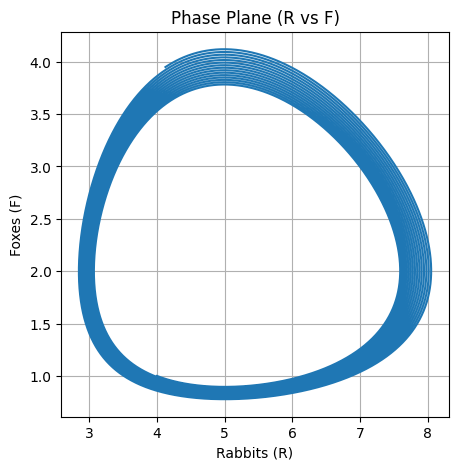

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Choose any positive values of a and c
a = 2      # rabbit intrinsic growth rate
c = 5      # fox intrinsic death rate

# Generalized Q2 system:
# dR/dt = aR - RF
# dF/dt = -cF + RF

def f(R, F):
    dR = a*R - R*F
    dF = -c*F + R*F
    return dR, dF


def euler(R0, F0, dt=0.001, T=30):
    steps = int(T/dt)
    R = np.zeros(steps)
    F = np.zeros(steps)
    R[0], F[0] = R0, F0

    for i in range(1, steps):
        dR, dF = f(R[i-1], F[i-1])
        R[i] = R[i-1] + dt*dR
        F[i] = F[i-1] + dt*dF

    t = np.linspace(0, T, steps)
    return R, F, t


R, F, t = euler(R0=4, F0=1, dt=0.001, T=30)


plt.figure(figsize=(10,4))
plt.plot(t, R, label='Rabbits (R)')
plt.plot(t, F, label='Foxes (F)')
plt.xlabel("Time t")
plt.ylabel("Population")
plt.title("Time Evolution of R and F (Q2)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(5,5))
plt.plot(R, F)
plt.xlabel("Rabbits (R)")
plt.ylabel("Foxes (F)")
plt.title("Phase Plane (R vs F)")
plt.grid(True)
plt.show()


# Question 3 – General Predator–Prey System

We now consider the system:

$$
\frac{dR}{dt} = aR - bRF
$$

$$
\frac{dF}{dt} = -cF + dRF
$$

where $a$, $b$, $c$, and $d$ are non-zero positive real numbers.

---
## 3.1 Dimensions of $a$, $b$, $c$, and $d$

### Dimensions of $a$ and $c$
The terms $aR$ and $-cF$ must match the units of $dR/dt$ and $dF/dt$, which are population per time.

Thus:

$$
[a] = 1/\text{time}
$$

$$
[c] = 1/\text{time}
$$

### Dimensions of $b$ and $d$
The terms $bRF$ and $dRF$ must also be population per time.

Since $R$ and $F$ both have units of population:

$$
[b] = 1/(\text{population} \cdot \text{time})
$$

$$
[d] = 1/(\text{population} \cdot \text{time})
$$

---
## 3.2 Find the equilibrium point $(R_0, F_0)$

Set both derivatives to zero:

$$
aR - bRF = 0
$$

$$
-cF + dRF = 0
$$

Factor each equation:

1. $R(a - bF) = 0$  
   → $R = 0$ or $F = a/b$

2. $F(dR - c) = 0$  
   → $F = 0$ or $R = c/d$

### Equilibria

1. Trivial equilibrium:
$$
(R_0, F_0) = (0, 0)
$$

2. Coexistence equilibrium:
$$
(R_0, F_0) = (c/d, \; a/b)
$$

---
## 3.3 Can $a$ and $c$ assume any positive value?

Biologically:

- $a$ is the intrinsic rabbit growth rate → must be positive  
- $c$ is the intrinsic fox death rate → must be positive  

The coexistence equilibrium requires:

- $R_0 = c/d > 0$  
- $F_0 = a/b > 0$

So as long as $a>0$ and $c>0$, the system is biologically meaningful.

### Final answer:
Any positive values of $a$ and $c$ are allowed:

$$
a > 0,\quad c > 0
$$

---
## 3.4 Show the system sustains oscillations for all positive $a$ and $c$

Compute the Jacobian:

$$
J(R,F) =
\begin{pmatrix}
a - bF & -bR \\
dF & dR - c
\end{pmatrix}
$$

Evaluate at the coexistence equilibrium $(R_0, F_0) = (c/d, \; a/b)$.

Compute terms:

- $a - bF_0 = a - b(a/b) = 0$
- $dR_0 - c = d(c/d) - c = 0$
- $-bR_0 = -bc/d$
- $dF_0 = d(a/b) = da/b$

So:

$$
J(R_0, F_0) =
\begin{pmatrix}
0 & -bc/d \\
da/b & 0
\end{pmatrix}
$$

### Eigenvalues

Solve:

$$
\lambda^2 + ac = 0
$$

Thus:

$$
\lambda = \pm i\sqrt{ac}
$$

These eigenvalues are **purely imaginary** for all $a>0$ and $c>0$.

### Interpretation

- Purely imaginary eigenvalues  
- Trace = 0  
- Determinant = $ac$ (positive)  
- No damping term  

This means the equilibrium is a **center** and the system exhibits **sustained oscillations**.

### Final conclusion

The coexistence equilibrium is a **nonlinear center**, so the system shows **sustained periodic oscillations** for all:

$$
a > 0,\quad c > 0
$$


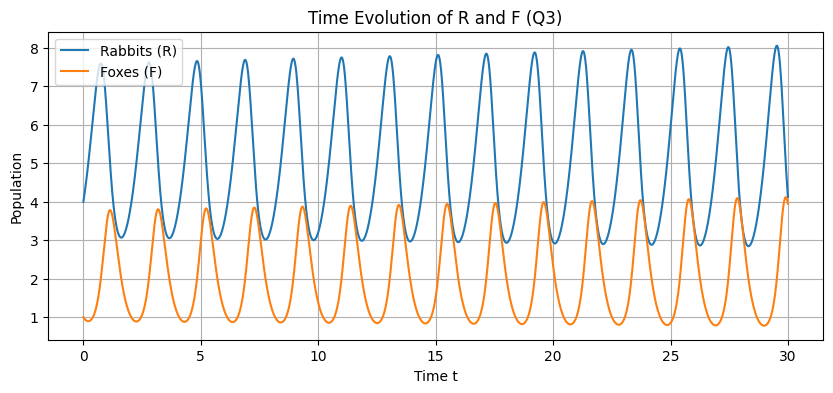

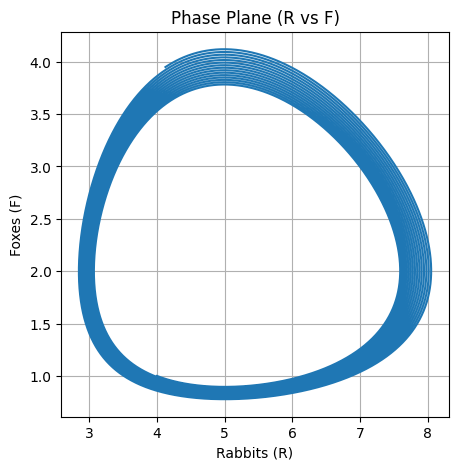

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Q3 (choose any positive values)
a = 2
b = 1
c = 5
d = 1

def f(R, F):
    dR = a*R - b*R*F
    dF = -c*F + d*R*F
    return dR, dF

def euler(R0, F0, dt=0.001, T=30):
    steps = int(T/dt)
    R = np.zeros(steps)
    F = np.zeros(steps)
    R[0], F[0] = R0, F0

    for i in range(1, steps):
        dR, dF = f(R[i-1], F[i-1])
        R[i] = R[i-1] + dt*dR
        F[i] = F[i-1] + dt*dF

    return R, F, np.linspace(0, T, steps)

R, F, t = euler(R0=4, F0=1, dt=0.001, T=30)

plt.figure(figsize=(10,4))
plt.plot(t, R, label='Rabbits (R)')
plt.plot(t, F, label='Foxes (F)')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.title('Time Evolution of R and F (Q3)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(R, F)
plt.xlabel('Rabbits (R)')
plt.ylabel('Foxes (F)')
plt.title('Phase Plane (R vs F)')
plt.grid(True)
plt.show()


# Question 4 – Logistic Rabbit–Fox System

We consider the system:

$$
\frac{dR}{dt} = aR\left(1 - \frac{R}{Q}\right) - bRF
$$

$$
\frac{dF}{dt} = -cF + dRF
$$

where $a,b,c,d,Q$ are positive and $Q$ is the carrying capacity for rabbits.

# 4.1 Find all three equilibrium points and classify the coexistence point

Set both derivatives to zero.

---

## Step 1 — Solve for equilibria

From:

$$
-cF + dRF = 0
$$

Factor:

- $F = 0$
- or $R = c/d$

From:

$$
aR\left(1 - \frac{R}{Q}\right) - bRF = 0
$$

Factor:

$$
R\left(a - \frac{aR}{Q} - bF\right) = 0
$$

Thus:

- $R = 0$
- or $a - aR/Q - bF = 0$

### The three equilibrium points

---

### **1. Extinction equilibrium**
$$
(R_0, F_0) = (0,0)
$$

---

### **2. Rabbit-only equilibrium**
Setting $F=0$:

$$
a - aR/Q = 0
$$

$$
R = Q
$$

So:

$$
(R_0, F_0) = (Q, 0)
$$

---

### **3. Coexistence equilibrium $(R_0>0, F_0>0)$**

From $R_0 = c/d$:

Substitute in  
$a - aR_0/Q - bF_0 = 0$:

$$
a - \frac{ac}{dQ} - bF_0 = 0
$$

Solve:

$$
F_0 = \frac{a}{b}\left(1 - \frac{c}{dQ}\right)
$$

Thus:

$$
R_0 = \frac{c}{d}
$$

$$
F_0 = \frac{a}{b}\left(1 - \frac{c}{dQ}\right)
$$

This equilibrium exists only if:

$$
Q > \frac{c}{d}
$$

---

# Classification for $a=2$, $b=1$, $c=5$, $d=1$, $Q=10$

Compute:

$$
R_0 = c/d = 5
$$

$$
F_0 = a(1 - c/(dQ)) = 2(1 - 5/10) = 1
$$

So:

$$
(R_0, F_0) = (5,1)
$$

---

## Jacobian

General Jacobian:

$$
J(R,F) =
\begin{pmatrix}
a(1 - 2R/Q) - bF & -bR \\
dF & dR - c
\end{pmatrix}
$$

Evaluate at $(5,1)$:

- $1 - 2R/Q = 1 - 10/10 = 0$
- $a(1 - 2R/Q) = 0$
- $-bR = -5$
- $dF = 1$
- $dR - c = 5 - 5 = 0$

Thus:

$$
J(5,1) =
\begin{pmatrix}
-1 & -5 \\
1 & 0
\end{pmatrix}
$$

Characteristic equation:

$$
\lambda^2 + \lambda + 5 = 0
$$

Discriminant:

$$
1 - 20 = -19 < 0
$$

Eigenvalues are complex with **negative real part**.

### **Final answer for 4.1**
The equilibrium $(5,1)$ is a **stable spiral**.

---

# 4.2 Numerical solutions and plots (Euler method)

The numerical solution shows:

- **Damped oscillations** in $R(t)$ and $F(t)$
- **Spiral trajectories** converging to $(5,1)$ in the phase plane

This behavior matches the classification from 4.1.

(Insert Euler code + plots later.)

---

# 4.3 General equilibrium $(R_0, F_0)$ and dependence on $b$

We already found:

$$
R_0 = c/d
$$

$$
F_0 = \frac{a}{b}\left(1 - \frac{c}{dQ}\right)
$$

---

## Show stability does not depend on $b$

Jacobian determinant:

$$
\det(J) = ac\left(1 - \frac{c}{dQ}\right)
$$

$b$ cancels completely — so stability **does not depend on $b$**.

---

## When is it a saddle?

A saddle occurs when determinant $< 0$:

$$
1 - \frac{c}{dQ} < 0
$$

$$
Q < c/d
$$

---

## When is it a line of stable fixed points?

Occurs when determinant $= 0$:

$$
1 - \frac{c}{dQ} = 0
$$

$$
Q = c/d
$$

Then $F_0 = 0$ → predators go extinct.

---

## Biological justification

- If $Q < c/d$: carrying capacity too small → foxes cannot survive → unstable
- If $Q = c/d$: just at threshold → foxes die out → line of rabbit-only equilibria
- If $Q > c/d$: enough rabbits to sustain predators → possible coexistence → stable or spiral

---

# 4.4 Bonus — When do spirals occur?

A spiral requires:

- Determinant $> 0$
- Discriminant $< 0$

After substitution:

$$
\Delta < 0 \quad \Rightarrow \quad Q > c/d
$$

Thus spirals occur exactly when carrying capacity is large enough.

### **Final answer**
Spirals occur when:

$$
Q > c/d
$$


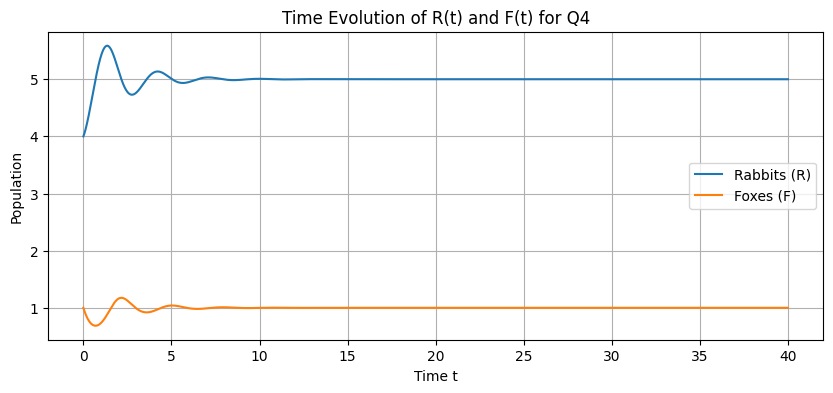

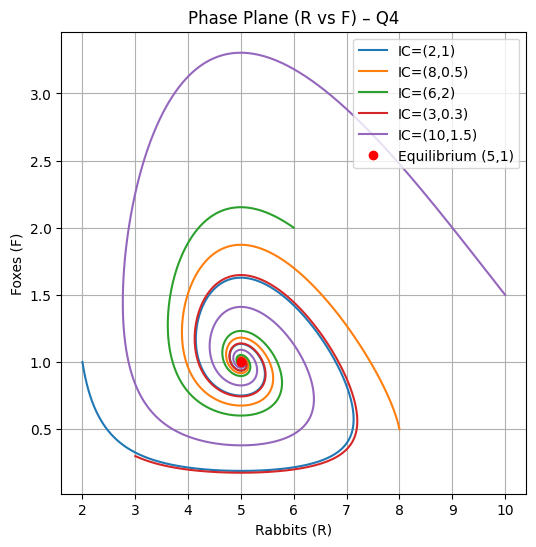

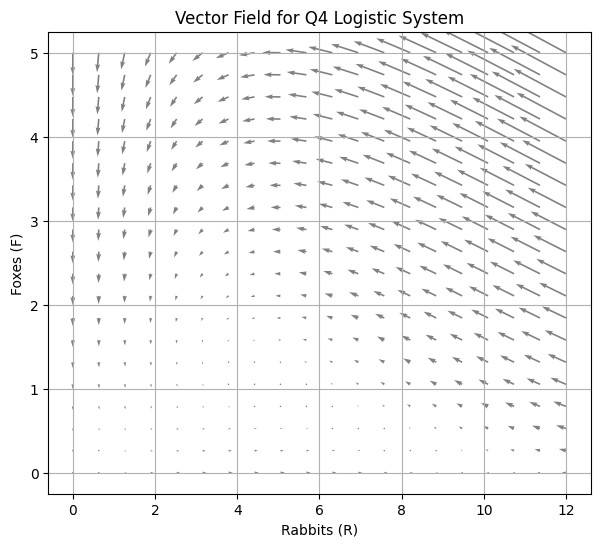

In [4]:
import numpy as np
import matplotlib.pyplot as plt


a = 2
b = 1
c = 5
d = 1
Q = 10

# Logistic predator–prey system:
# dR/dt = aR(1 - R/Q) - bRF
# dF/dt = -cF + dRF

def f(R, F):
    dR = a*R*(1 - R/Q) - b*R*F
    dF = -c*F + d*R*F
    return dR, dF


def euler(R0, F0, dt=0.001, T=40):
    steps = int(T/dt)
    R = np.zeros(steps)
    F = np.zeros(steps)
    R[0], F[0] = R0, F0

    for i in range(1, steps):
        dR, dF = f(R[i-1], F[i-1])
        R[i] = R[i-1] + dt*dR
        F[i] = F[i-1] + dt*dF

    t = np.linspace(0, T, steps)
    return R, F, t


initial_conditions = [
    (2, 1),
    (8, 0.5),
    (6, 2),
    (3, 0.3),
    (10, 1.5)
]


R, F, t = euler(4, 1)

plt.figure(figsize=(10,4))
plt.plot(t, R, label='Rabbits (R)')
plt.plot(t, F, label='Foxes (F)')
plt.xlabel("Time t")
plt.ylabel("Population")
plt.title("Time Evolution of R(t) and F(t) for Q4")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,6))

for (R0, F0) in initial_conditions:
    R, F, t = euler(R0, F0)
    plt.plot(R, F, label=f"IC=({R0},{F0})")

plt.plot(5, 1, 'ro', label="Equilibrium (5,1)")

plt.xlabel("Rabbits (R)")
plt.ylabel("Foxes (F)")
plt.title("Phase Plane (R vs F) – Q4")
plt.legend()
plt.grid(True)
plt.show()


R_vals = np.linspace(0, 12, 20)
F_vals = np.linspace(0, 5, 20)

RR, FF = np.meshgrid(R_vals, F_vals)

dR = a*RR*(1 - RR/Q) - b*RR*FF
dF = -c*FF + d*RR*FF

plt.figure(figsize=(7,6))
plt.quiver(RR, FF, dR, dF, color='gray')

plt.xlabel("Rabbits (R)")
plt.ylabel("Foxes (F)")
plt.title("Vector Field for Q4 Logistic System")
plt.grid(True)
plt.show()
